## Modelling Notebook

This is the main modelling notebook - which does both time series split and train test split

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('../data/curated/Processed Data Final.csv')

In [20]:
target = 'average_weekly_rent/inflation/household_size'

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df.dropna(inplace=True)

In [23]:
# remove Nan for target variable
df = df[~df[target].isna()]

In [24]:
df.to_csv("../data/curated/procesed_data.csv", index=False)

df.drop(columns=['Average_household_size'], inplace=True)

In [25]:
df_dropped = df[df['year'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]

In [26]:
df_dropped = df_dropped.drop(columns=['SAL_CODE', 'year', 'average_quarterly_count'])

### Part 1 - Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

# PRELIMINARY ------ TRAIN TEST SPLIT THROUGH SPACE --------------------------

X = df_dropped.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(df_dropped.drop(columns=[target]), df[target], test_size=0.2, random_state=42)



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

Linear Regression Mean Squared Error: 256.8410352446436
Linear Regression R^2 Score: 0.7921948028334914


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the StandardScaler
scaler = StandardScaler()



# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 66.89127601527116
Random Forest R^2 Score: 0.9458795406745166


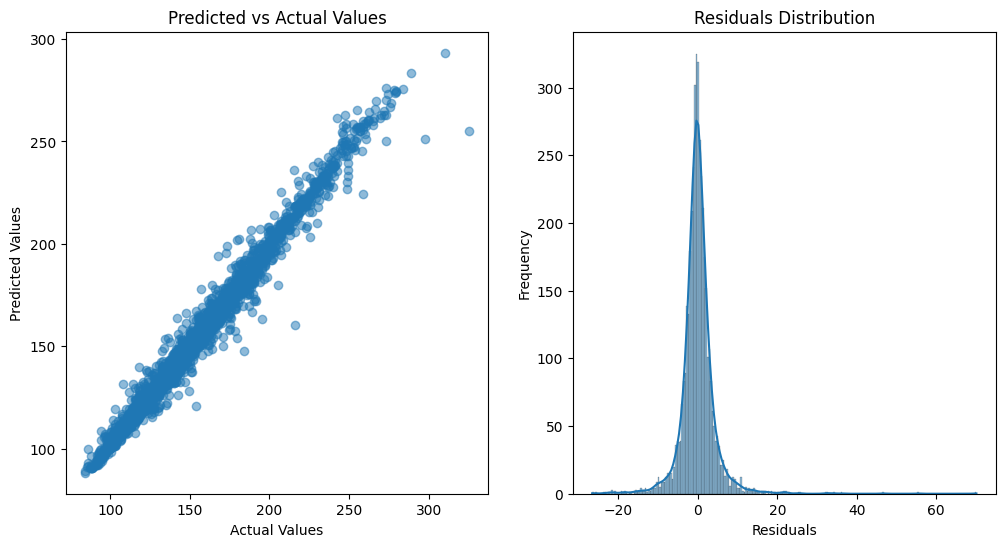

In [30]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y, rf_model.predict(X), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

# Calculate residuals
residuals = y - rf_model.predict(X)

# Plot residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig("../plots/residuals_RF.png")

plt.show()



/opt/anaconda3/envs/ADS/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/ADS/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


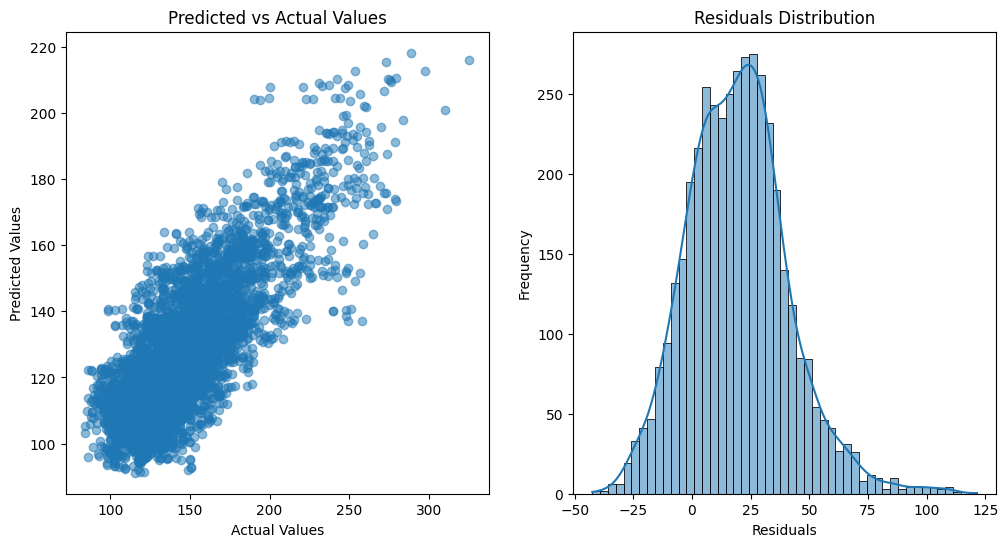

In [31]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y, lr_model.predict(X), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')

# Calculate residuals
residuals = y - lr_model.predict(X)

# Plot residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.savefig("../plots/residuals_LG.png")

plt.show()



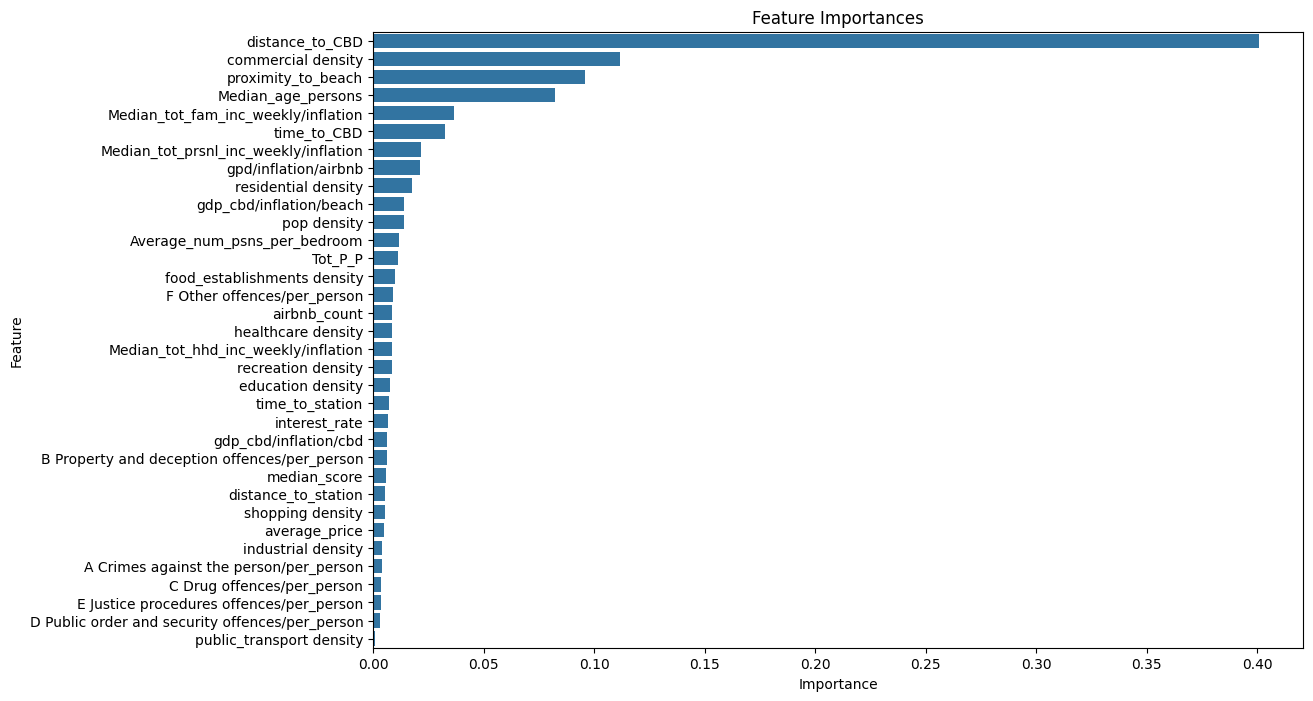

In [32]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.savefig("../plots/feature_importance.png")


plt.show()



In [33]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 68.22606402539127
Random Forest R^2 Score: 0.9447995890797324


In [34]:
X_train.columns


Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Average_num_psns_per_bedroom', 'Median_age_persons',
       'Tot_P_P', 'median_score', 'average_price', 'proximity_to_beach',
       'airbnb_count', 'commercial density', 'education density',
       'food_establishments density', 'healthcare density',
       'industrial density', 'public_transport density', 'recreation density',
       'residential density', 'shopping density', 'pop density',
       'interest_rate', 'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'A Crimes against the person/per_person',
       'B Property and deception offences/per_person',
       'C Drug offences/per_person',
       'D Public order and security offences/per_person',
       'E Justice procedures offences/per_person',
       'F Other offence

In [35]:
import geopandas as gpd
import pandas as pd

In [36]:
from math import asin
from numpy import cos, sin, sqrt, radians


melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r



def generate_plot(ax, df, col, sal_code="SAL_CODE", name="", vmin=None, vmax=None):
    """
    Generates a plot on the given Axes object using the provided DataFrame and column.
    Parameters:
    ax (matplotlib.axes.Axes): The matplotlib Axes object where the plot will be drawn.
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    col (str): The column name in the DataFrame to be used for plotting.
    sal_code (str, optional): The column name in the DataFrame representing the SAL code. Default is "SAL_CODE".
    name (str, optional): The title of the plot. Default is an empty string.
    vmin (float, optional): The minimum value for the color scale. Default is None.
    vmax (float, optional): The maximum value for the color scale. Default is None.
    Returns:
    None
    """
    sal_code = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

    # Drop non-integer SAL_CODE21 values
    sal_code = sal_code[sal_code['SAL_CODE21'].apply(lambda x: str(x).isdigit())]
    sal_code["SAL_CODE21"] = sal_code["SAL_CODE21"].astype(int)

    merged_df = sal_code.merge(df, left_on='SAL_CODE21', right_on='SAL_CODE', how='inner')

    # Apply the function to calculate distance to Melbourne CBD
    merged_df['distance_to_CBD'] = merged_df.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

    # Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
    merged_df = merged_df[merged_df['distance_to_CBD'] <= 100]
    
    # Plot the data
    ax.set_title(name)
    merged_df.plot(column=col, ax=ax, legend=True, cmap='coolwarm', vmin=vmin, vmax=vmax, )

    

In [37]:
df['year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
4216    2024
4217    2024
4218    2024
4219    2024
4220    2024
Name: year, Length: 4221, dtype: int64

### Part 2 - Time series analysis

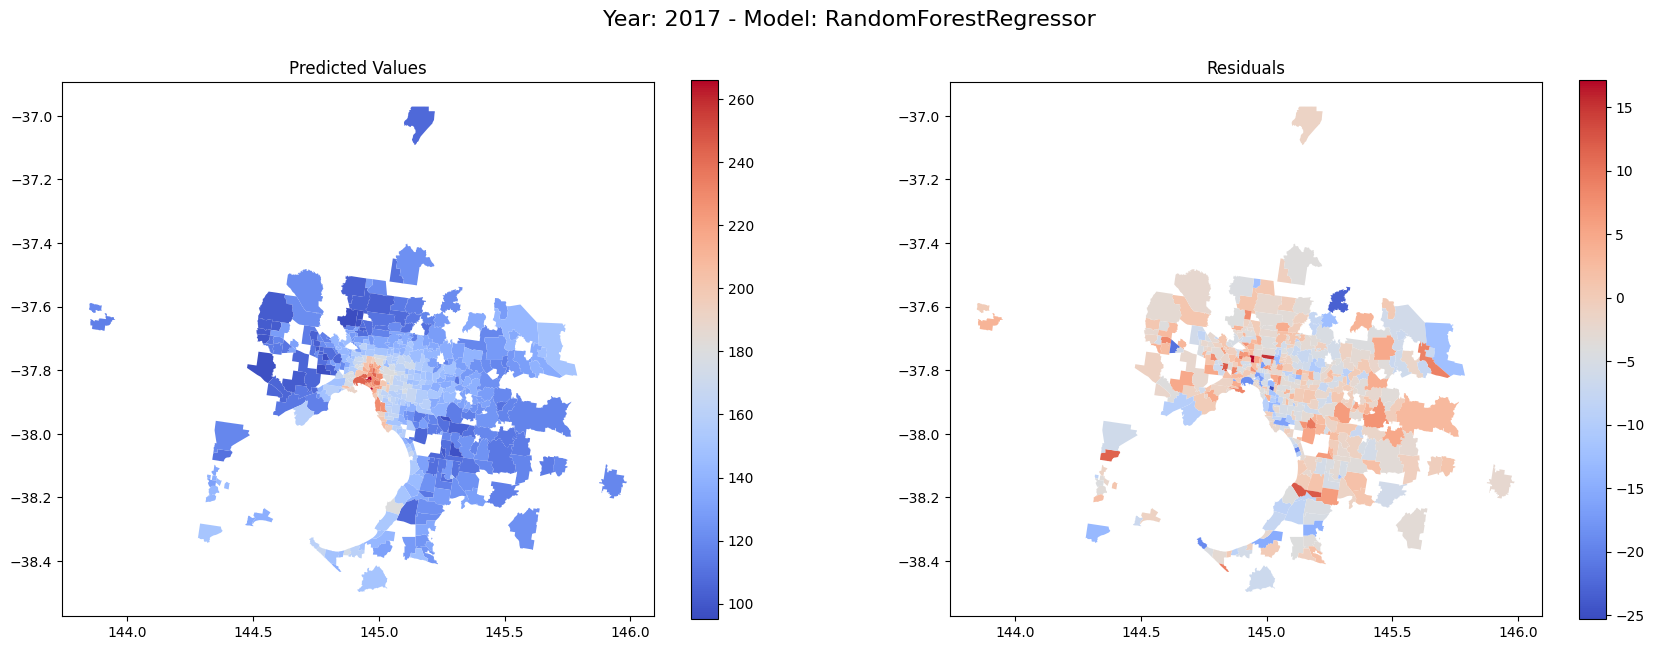

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


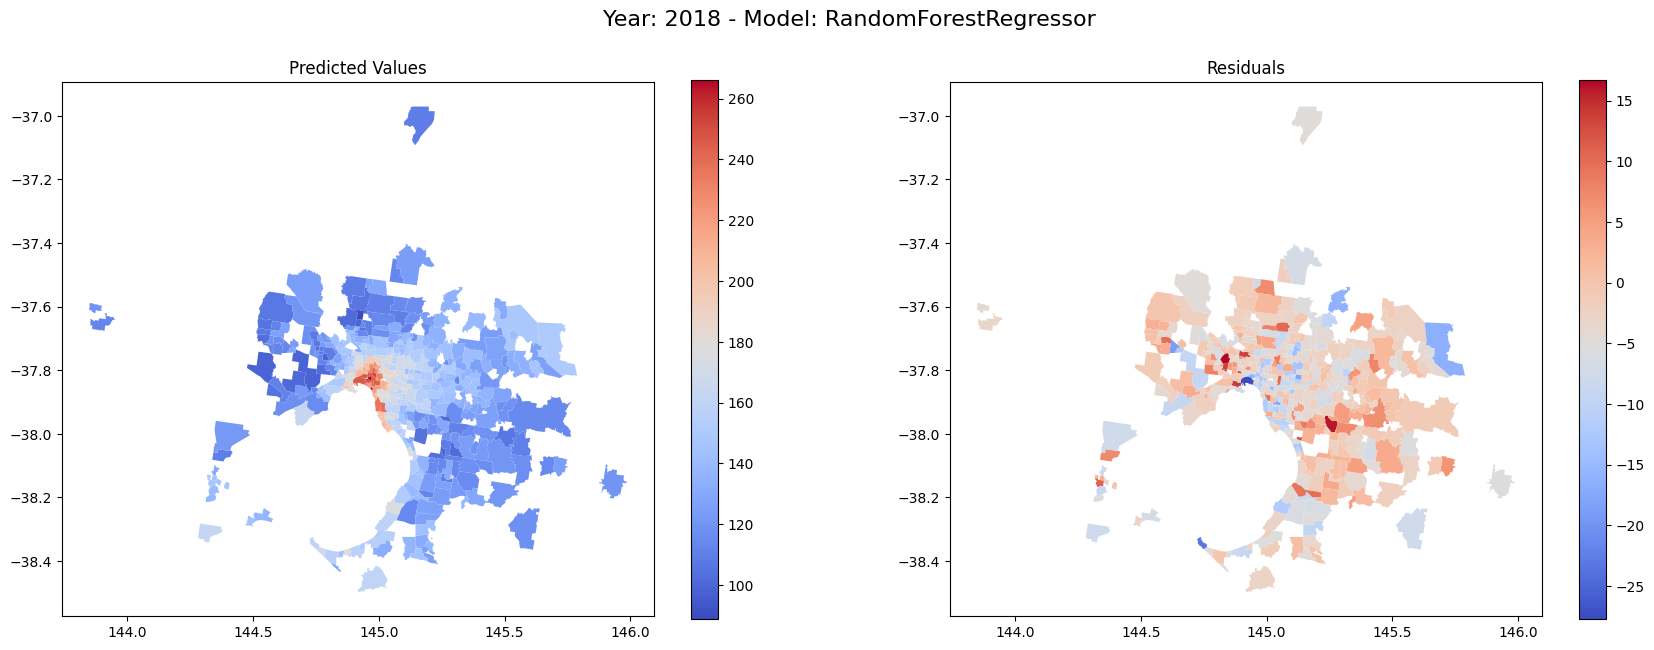

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


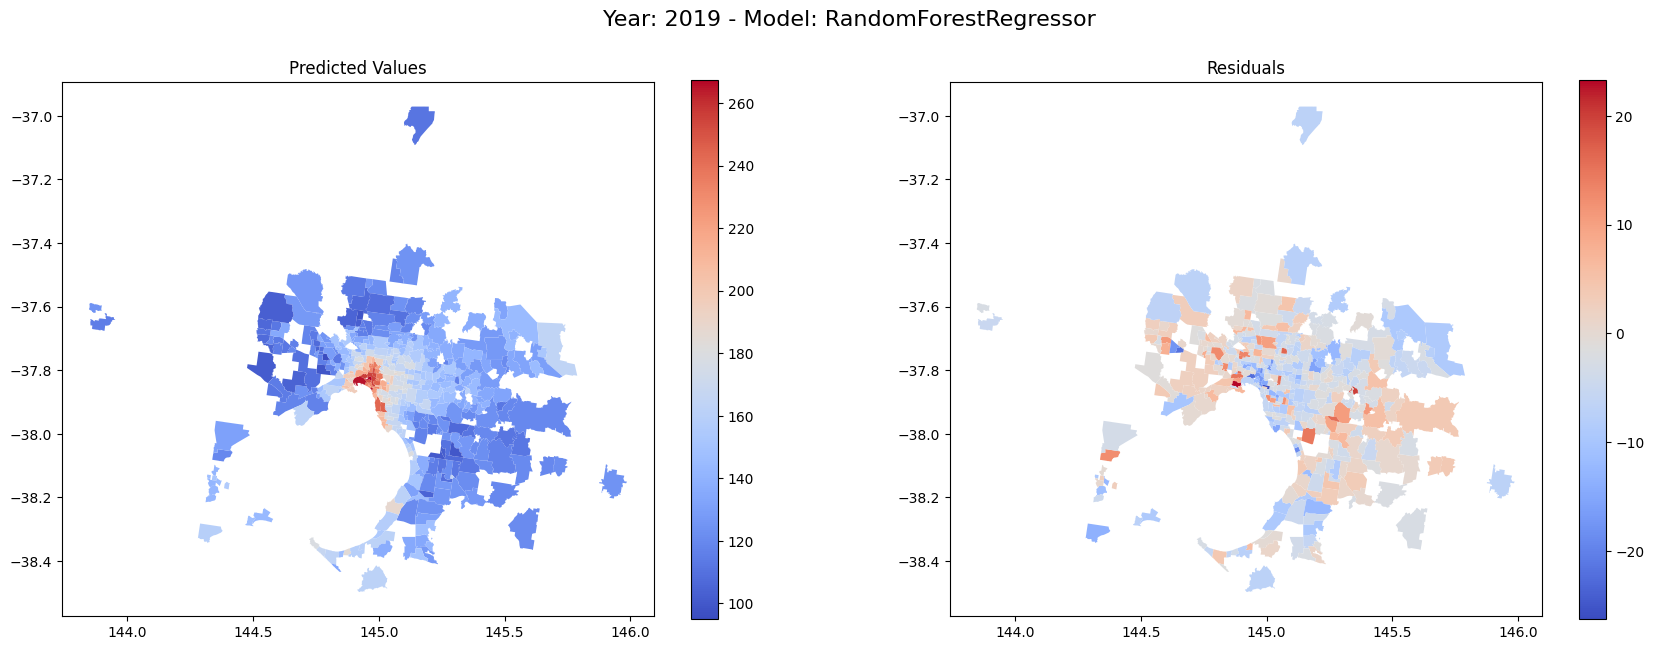

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


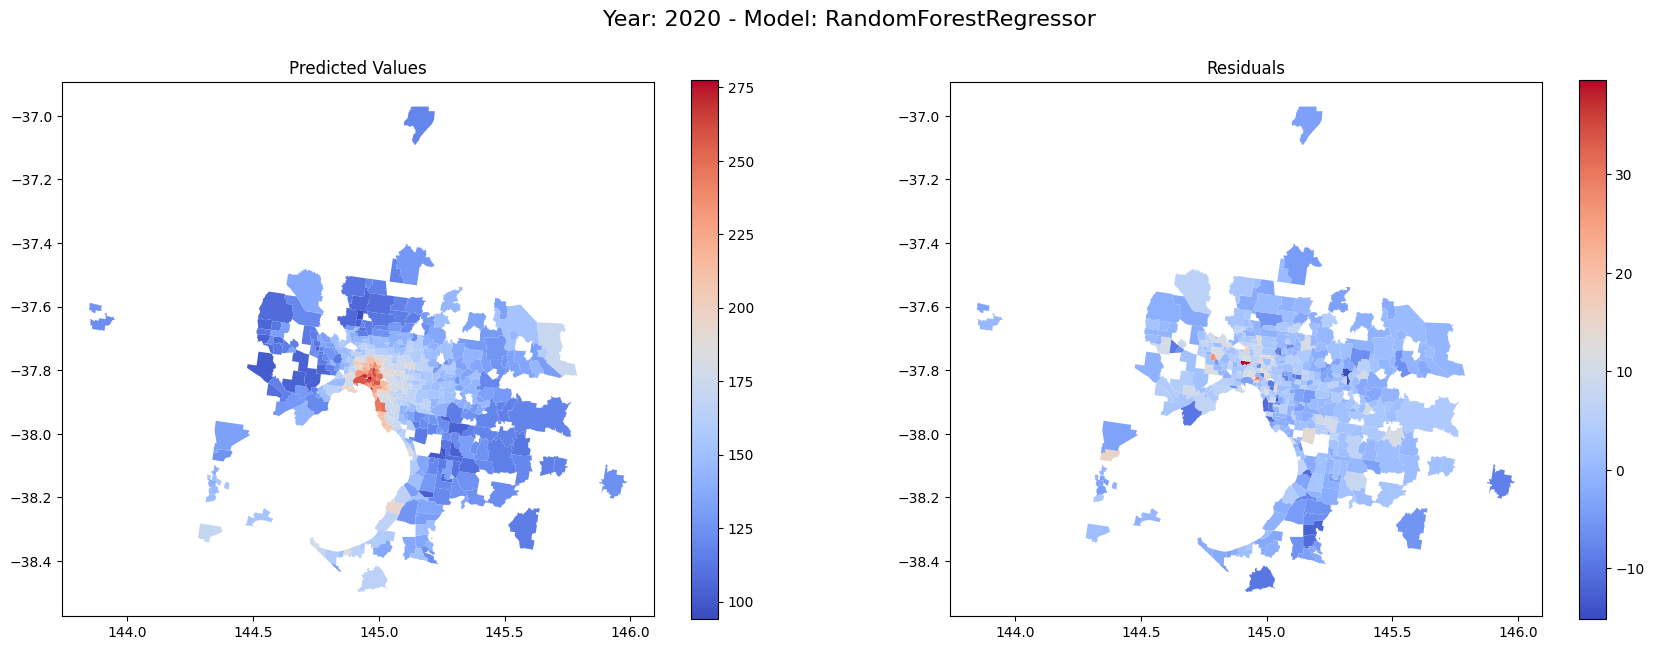

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


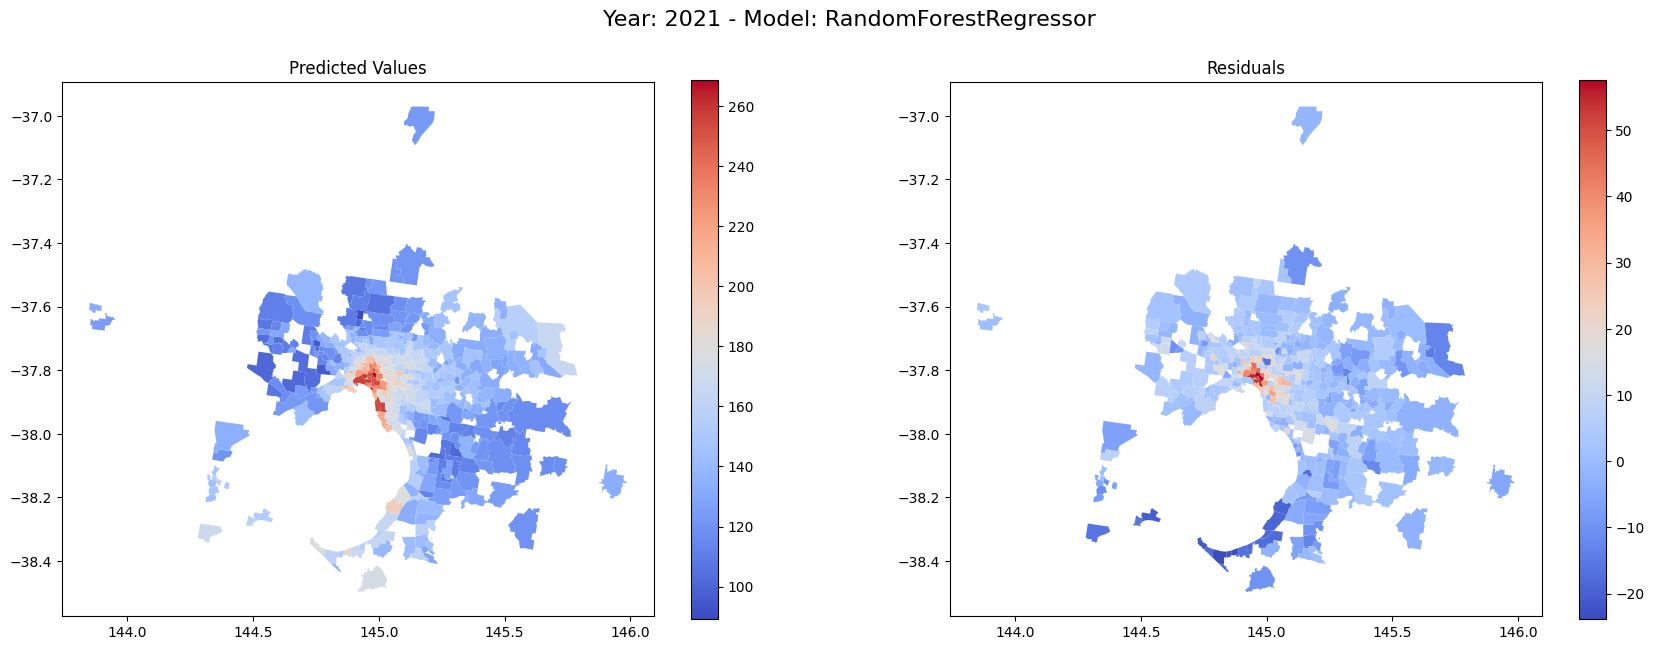

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


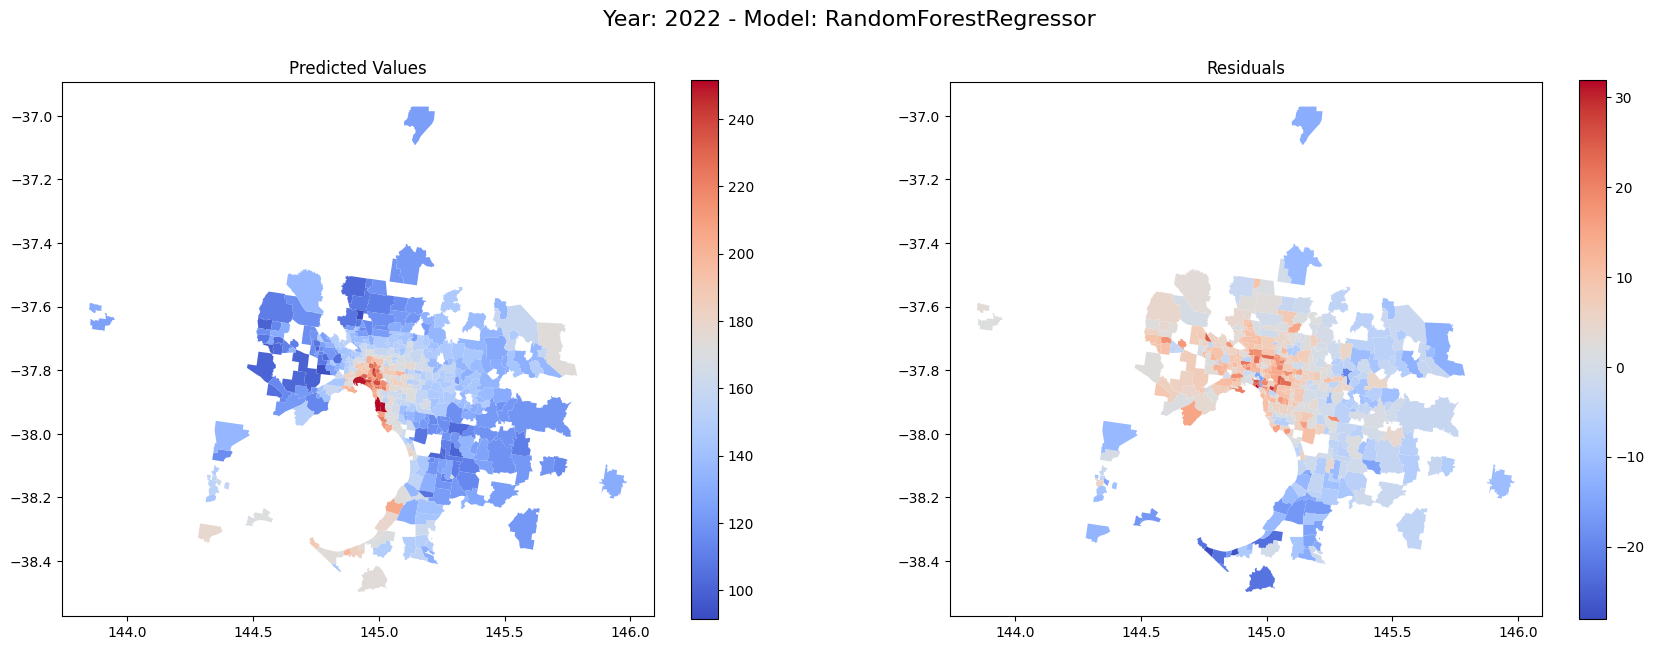

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


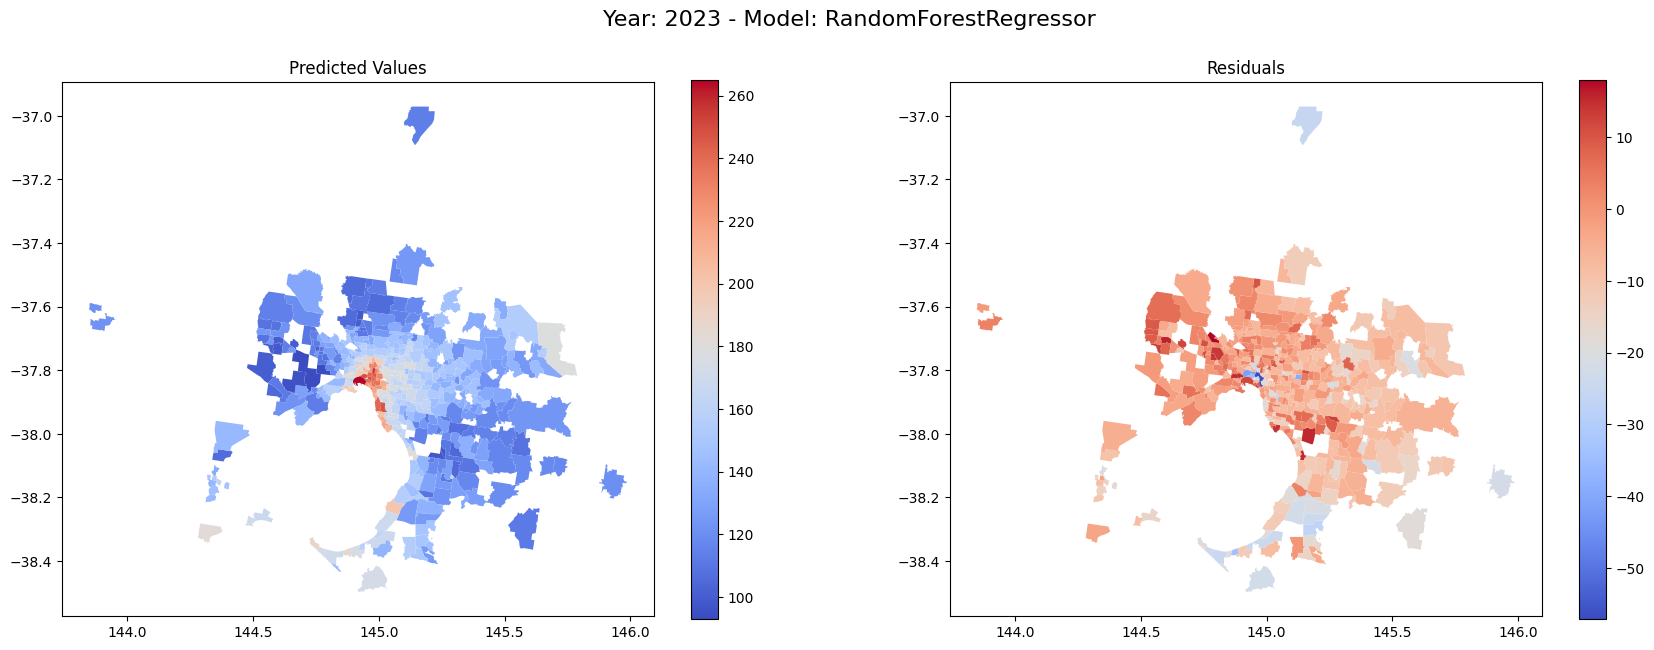

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


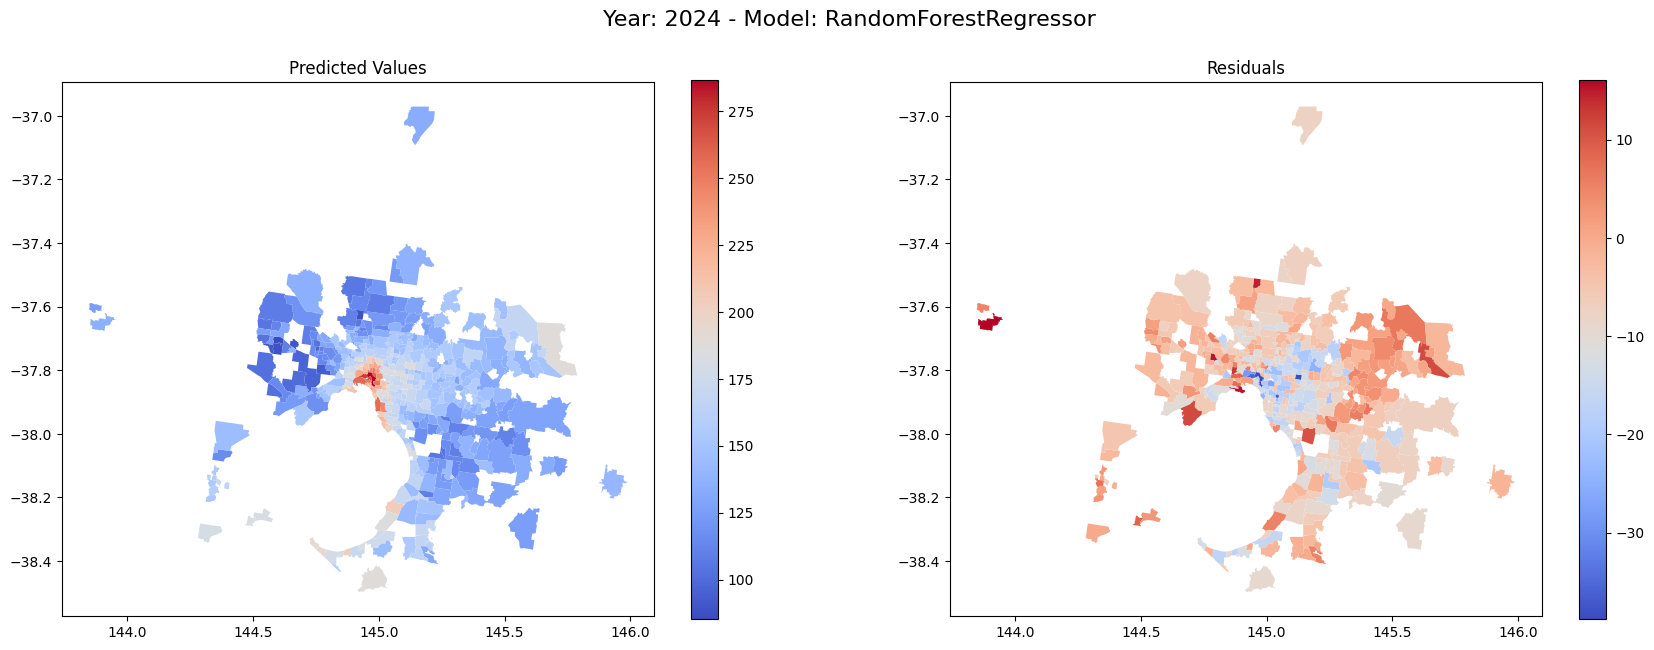

                                        train_years test_year         mse  \
0                                            [2016]    [2017]   35.461962   
1                                      [2016, 2017]    [2018]   38.708153   
2                                [2016, 2017, 2018]    [2019]   45.277704   
3                          [2016, 2017, 2018, 2019]    [2020]   38.259844   
4                    [2016, 2017, 2018, 2019, 2020]    [2021]  153.798125   
5              [2016, 2017, 2018, 2019, 2020, 2021]    [2022]  101.191369   
6        [2016, 2017, 2018, 2019, 2020, 2021, 2022]    [2023]  132.810465   
7  [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]    [2024]  105.500509   

         r2  
0  0.968386  
1  0.967878  
2  0.964875  
3  0.967996  
4  0.820816  
5  0.887860  
6  0.887559  
7  0.921982  


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/1756195909.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


In [38]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # Import XGBRegressor

# ----- Time Series Split -------

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year']), df.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]

    
    # Initialize and train the model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    SAL_test = df.iloc[test_index]['SAL_CODE']
    
    df_graphing = pd.DataFrame({
        'SAL_CODE': SAL_test,
        'pred': y_pred,
        'actual' : y_test,
        'residuals': y_pred - y_test
    })
    

    fig, axes = plt.subplots(1, 2, figsize=(21, 7))

    # Add a big title for the year
    fig.suptitle(f'Year: {test_year[0]} - Model: RandomForestRegressor', fontsize=16)

    generate_plot(axes[0], df_graphing, "pred")
    axes[0].set_title('Predicted Values')

    generate_plot(axes[1], df_graphing, 'residuals')
    axes[1].set_title('Residuals')
    # Add text annotation for the year and the type of model
    plt.savefig(f"../plots/RF_residuals_{test_year[0]}.png")
    plt.show()




    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)

# Display the results
print(results)

,SAL_CODE,pred,actual,residuals
3752,21319,144.859299,149.060433,-4.201135
3753,20974,161.680618,158.435728,3.244891
3754,20062,134.785706,146.105262,-11.319556
3755,21246,169.292633,182.107449,-12.814816
3756,21966,221.205460,229.438406,-8.232946
...,...,...,...,...
4216,20362,213.486694,218.196082,-4.709388
4217,20495,242.546463,253.436808,-10.890345
4218,20581,123.207062,127.656287,-4.449225
4219,20582,114.325554,119.096244,-4.770690


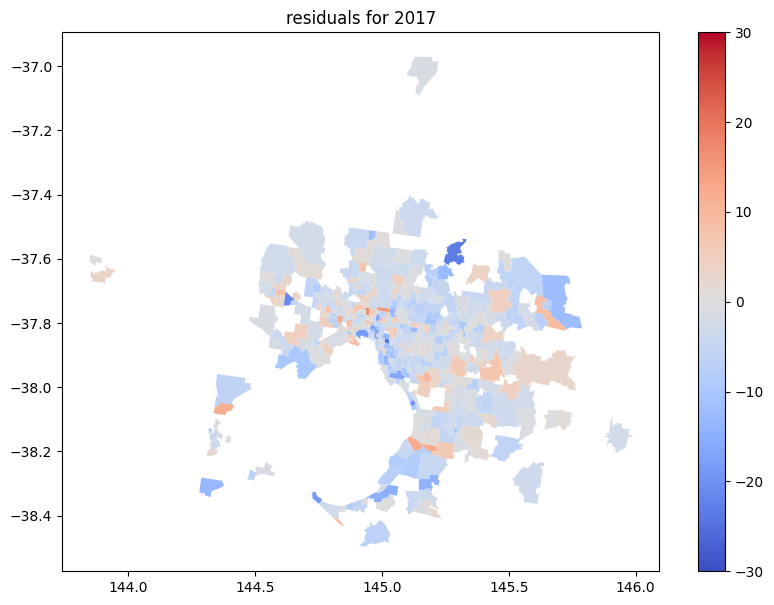

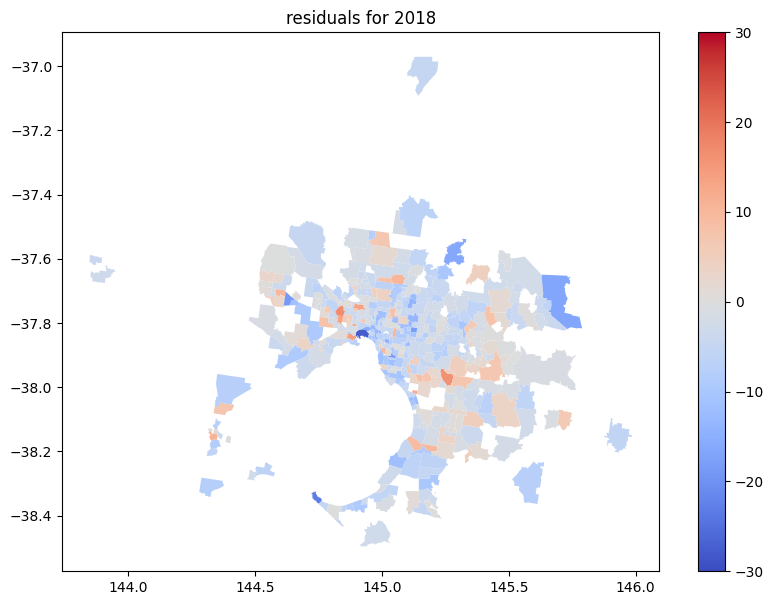

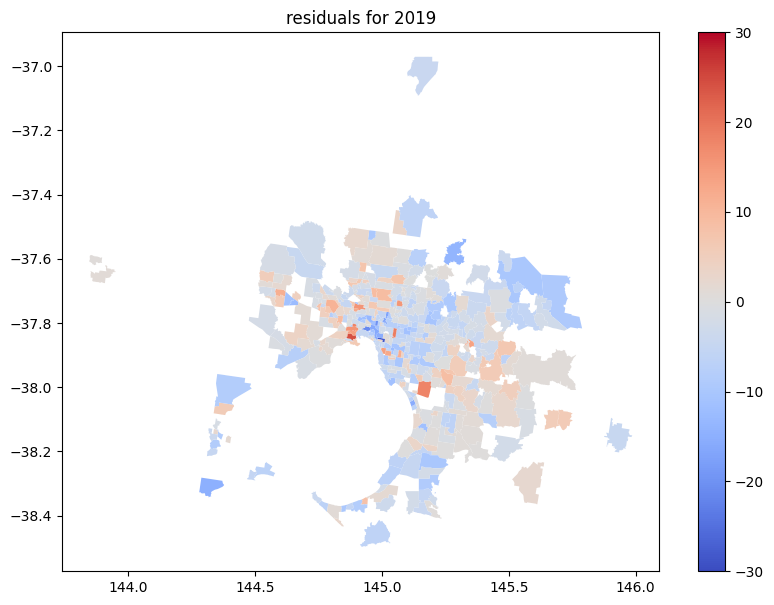

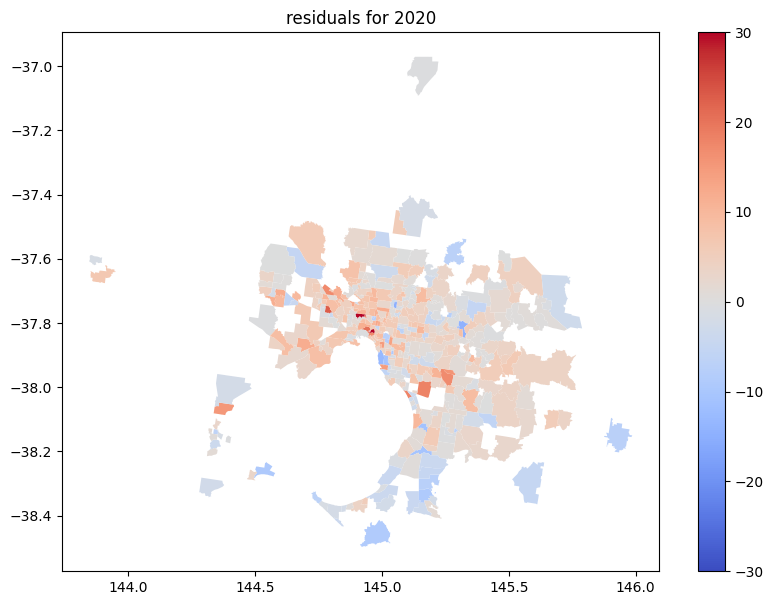

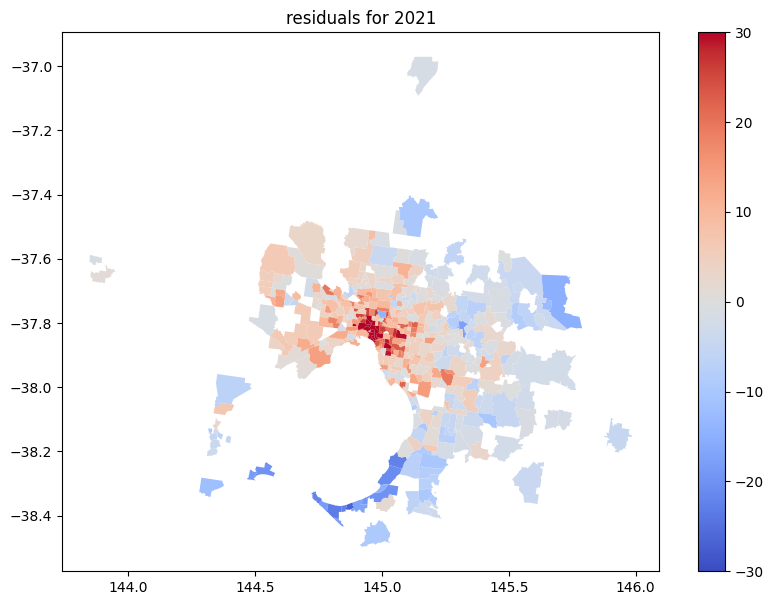

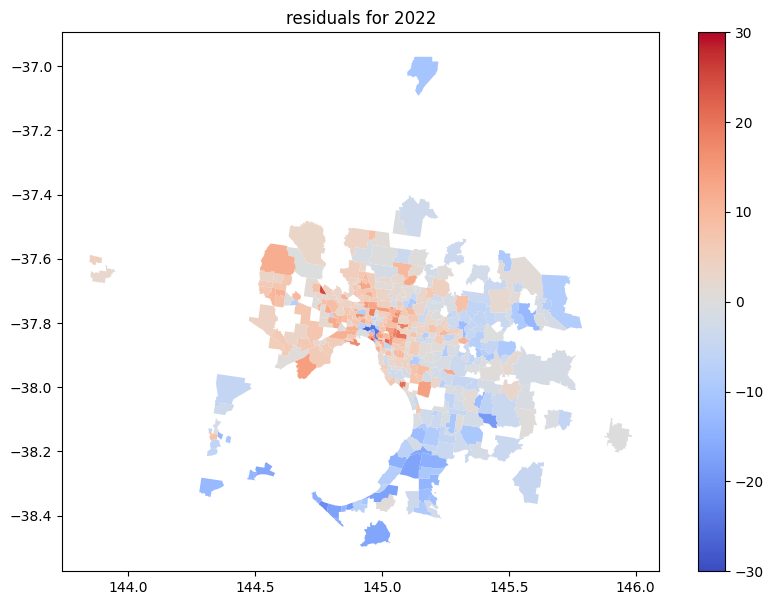

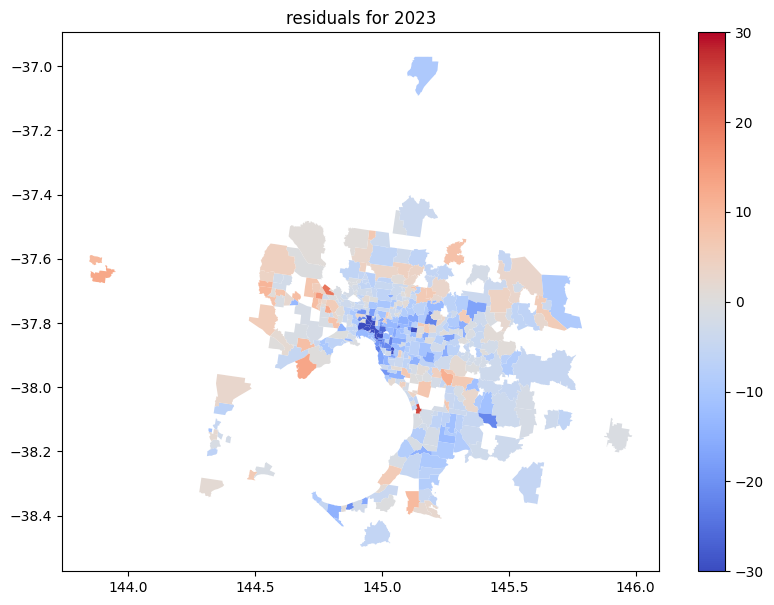

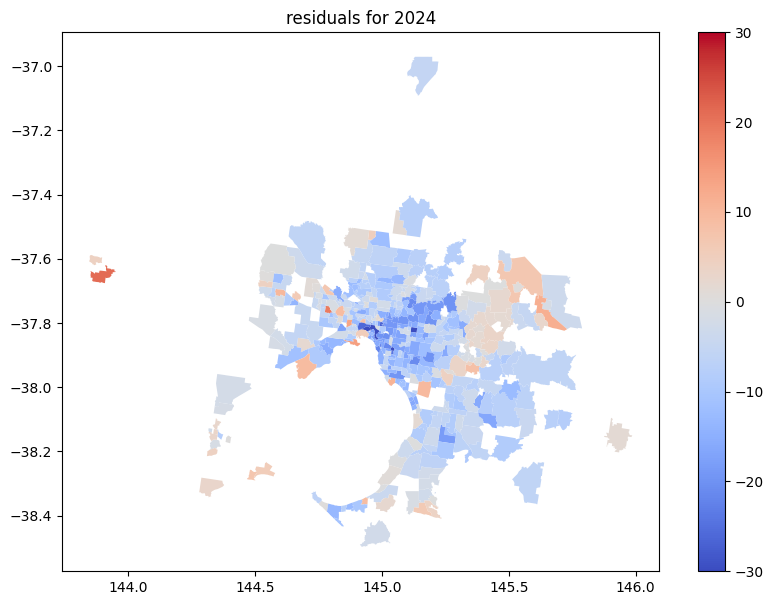

In [39]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor  # Import XGBRegressor

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one

n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

dfs = []

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target]), df.iloc[test_index].drop(columns=[target])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]

    
    # Initialize and train the model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    SAL_test = df.iloc[test_index]['SAL_CODE']
    
    df_graphing = pd.DataFrame({
        'SAL_CODE': SAL_test,
        'pred': y_pred,
        'actual' : y_test,
        'residuals': y_pred - y_test
    })

    dfs.append(df_graphing)

    fig, axes = plt.subplots(figsize=(10, 7))

    generate_plot(axes, df_graphing, 'residuals', name=f"residuals for {test_year[0]}", vmax=30, vmin=-30)
    plt.savefig(f"../plots/XGBOOSTresiduals_{test_year[0]}.png")


dfs[-1]

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/203489540.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'mean_actual': mean_actual, 'mean_predicted': mean_predicted}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/203489540.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'mean_actual': mean_actual, 'mean_predicted': mean_predicted}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/203489540.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

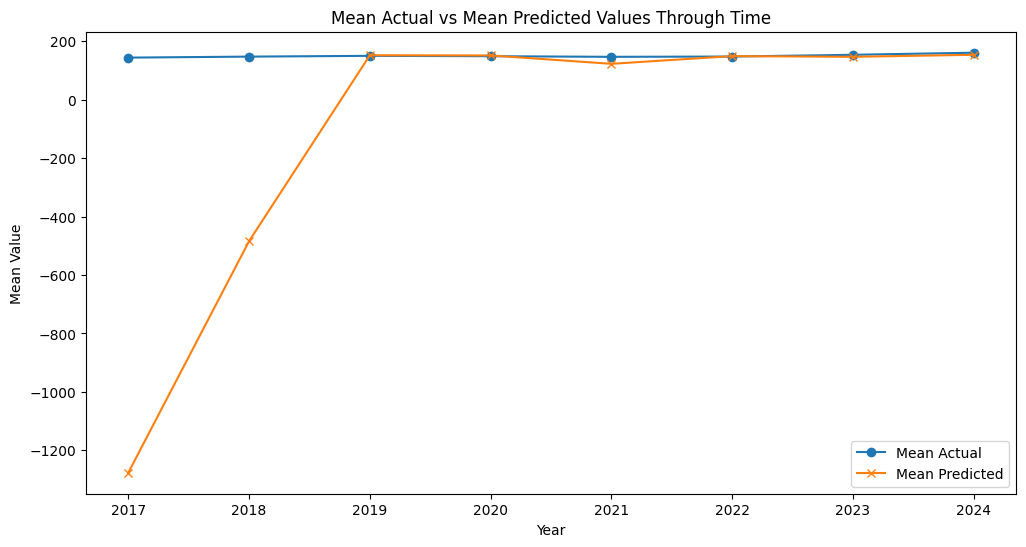

                                        train_years test_year           mse  \
0                                            [2016]      2017  2.017016e+06   
1                                      [2016, 2017]      2018  3.986628e+05   
2                                [2016, 2017, 2018]      2019  1.742532e+02   
3                          [2016, 2017, 2018, 2019]      2020  1.825328e+02   
4                    [2016, 2017, 2018, 2019, 2020]      2021  8.755986e+02   
5              [2016, 2017, 2018, 2019, 2020, 2021]      2022  3.432103e+02   
6        [2016, 2017, 2018, 2019, 2020, 2021, 2022]      2023  3.273434e+02   
7  [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]      2024  3.311369e+02   

            r2  mean_actual  mean_predicted  
0 -1797.128417   143.653082    -1276.511564  
1  -329.831115   147.056260     -484.217089  
2     0.864821   149.720245      151.717318  
3     0.847314   148.427841      151.039487  
4    -0.020122   146.350302      122.445628  
5     0.6196

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year','SAL_CODE']), df.iloc[test_index].drop(columns=[target, 'year','SAL_CODE'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate mean actual and mean predicted values
    mean_actual = y_test.mean()
    mean_predicted = y_pred.mean()
    
    # Append the results to the DataFrame
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2, 'mean_actual': mean_actual, 'mean_predicted': mean_predicted}, ignore_index=True)

# Plot mean actual and mean predicted values through time
plt.figure(figsize=(12, 6)) 
plt.plot(results['test_year'], results['mean_actual'], label='Mean Actual', marker='o')
plt.plot(results['test_year'], results['mean_predicted'], label='Mean Predicted', marker='x')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Actual vs Mean Predicted Values Through Time')
plt.legend()
plt.show()

# Display the results
print(results)


In [41]:
# Get counts per year
year_counts = df['year'].value_counts().sort_index()

# Print the counts
print(year_counts)

2016    469
2017    469
2018    469
2019    469
2020    469
2021    469
2022    469
2023    469
2024    469
Name: year, dtype: int64


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/302009939.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/302009939.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/302009939.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_30335/302009939.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
/var/folders/vs/mmhmvz21

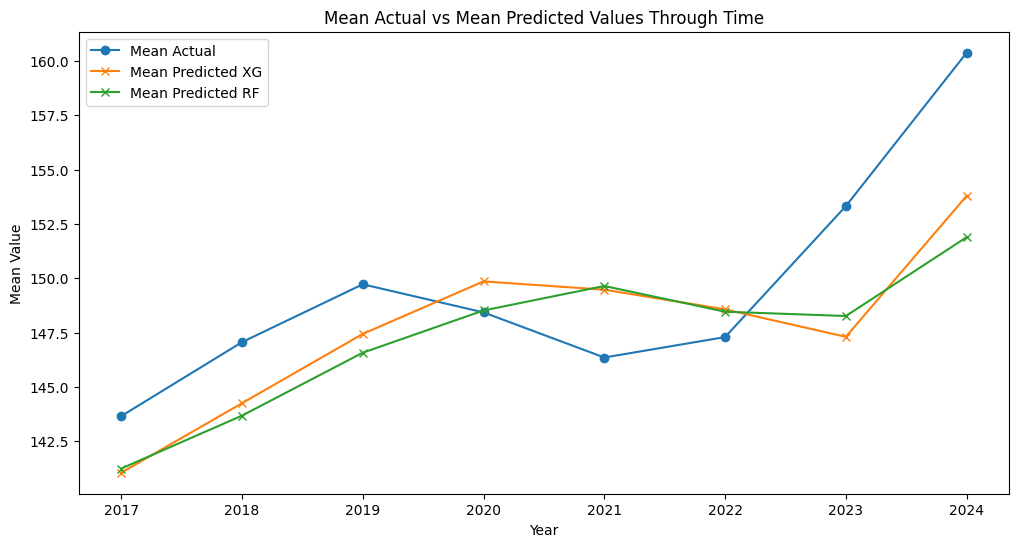

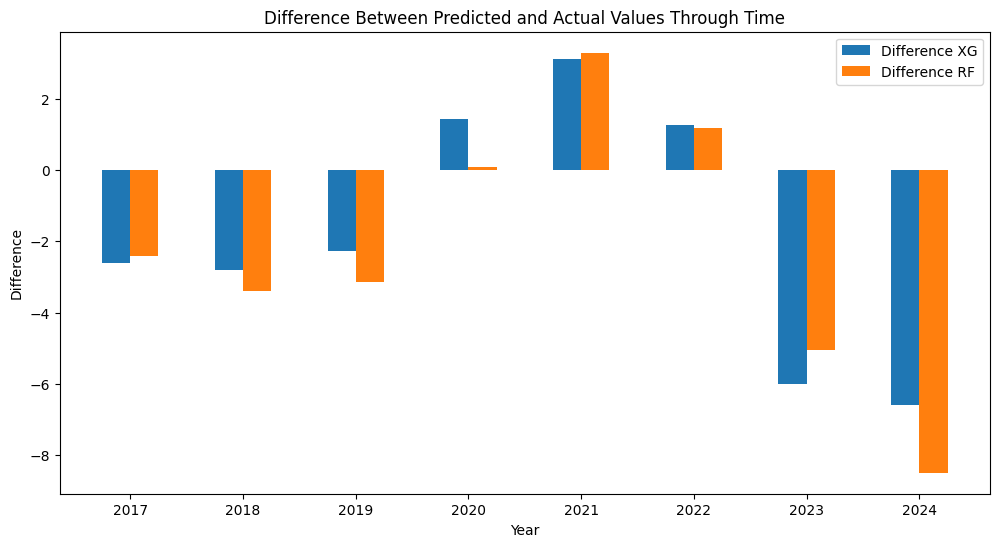

                                        train_years test_year      mse_XG  \
0                                            [2016]      2017   39.735413   
1                                      [2016, 2017]      2018   45.068627   
2                                [2016, 2017, 2018]      2019   42.803328   
3                          [2016, 2017, 2018, 2019]      2020   36.330456   
4                    [2016, 2017, 2018, 2019, 2020]      2021  156.699855   
5              [2016, 2017, 2018, 2019, 2020, 2021]      2022  109.931314   
6        [2016, 2017, 2018, 2019, 2020, 2021, 2022]      2023  122.117698   
7  [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]      2024  107.112798   

      r2_XG        mse_LG        r2_LG      mse_RF     r2_RF  mean_actual  \
0  0.964577  2.017016e+06 -1797.128417   69.716054  0.937850   143.653082   
1  0.962600  3.986628e+05  -329.831115   51.483721  0.957276   147.056260   
2  0.966795  1.742532e+02     0.864821   48.796052  0.962146   149.720245  

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse_XG', 'r2_XG', 'mse_LG', 'r2_LG', 'mse_RF', 'r2_RF'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year','SAL_CODE']), df.iloc[test_index].drop(columns=[target, 'year','SAL_CODE'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    
    # Initialize and train the models
    modelXGBR = xgb.XGBRegressor(objective='reg:squarederror')
    modelXGBR.fit(X_train, y_train)

    modelLG = LinearRegression()
    modelLG.fit(X_train, y_train)

    modelRF = RandomForestRegressor(random_state=42)
    modelRF.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_XG = modelXGBR.predict(X_test)
    y_pred_LG = modelLG.predict(X_test)
    y_pred_RF = modelRF.predict(X_test)
    
    # Evaluate the models
    mse_XG = mean_squared_error(y_test, y_pred_XG)
    r2_XG = r2_score(y_test, y_pred_XG)
    
    mse_LG = mean_squared_error(y_test, y_pred_LG)
    r2_LG = r2_score(y_test, y_pred_LG)
    
    mse_RF = mean_squared_error(y_test, y_pred_RF)
    r2_RF = r2_score(y_test, y_pred_RF)
    
    # Calculate mean actual and mean predicted values
    mean_actual = y_test.mean()

    mean_predicted_XG = y_pred_XG.mean()
    mean_predicted_LG = y_pred_LG.mean()
    mean_predicted_RF = y_pred_RF.mean()
    
    # Append the results to the DataFrame
    results = results.append({
        'train_years': train_years, 
        'test_year': test_year, 
        'mse_XG': mse_XG, 
        'r2_XG': r2_XG, 
        'mse_LG': mse_LG, 
        'r2_LG': r2_LG, 
        'mse_RF': mse_RF, 
        'r2_RF': r2_RF, 
        'mean_actual': mean_actual, 
        'mean_predicted_XG': mean_predicted_XG, 
        'mean_predicted_LG': mean_predicted_LG, 
        'mean_predicted_RF': mean_predicted_RF
    }, ignore_index=True)

# Plot mean actual and mean predicted values through time
plt.figure(figsize=(12, 6)) 
plt.plot(results['test_year'], results['mean_actual'], label='Mean Actual', marker='o')
plt.plot(results['test_year'], results['mean_predicted_XG'], label='Mean Predicted XG', marker='x')
#plt.plot(results['test_year'], results['mean_predicted_LG'], label='Mean Predicted LG', marker='x')
plt.plot(results['test_year'], results['mean_predicted_RF'], label='Mean Predicted RF', marker='x')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Actual vs Mean Predicted Values Through Time')
plt.legend()
plt.savefig("../plots/mean_actual_vs_predicted_through_time.png")
plt.show()


# Plot the difference between predicted and actual values as a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.25
years = results['test_year']
index = np.arange(len(years))

plt.bar(index, results['mean_predicted_XG'] - results['mean_actual'], bar_width, label='Difference XG')
#plt.bar(index + bar_width, results['mean_predicted_LG'] - results['mean_actual'], bar_width, label='Difference LG')
plt.bar(index + bar_width, results['mean_predicted_RF'] - results['mean_actual'], bar_width, label='Difference RF')

plt.xlabel('Year')
plt.ylabel('Difference')
plt.title('Difference Between Predicted and Actual Values Through Time')
plt.xticks(index + bar_width / 2, years)
plt.legend()
plt.savefig("../plots/difference_predicted_actual_through_time.png")
plt.show()



# Display the results
print(results)


In [43]:
# Drop the 'year' column from the dataset
X_no_year = df.drop(columns=[target, 'year','SAL_CODE'])


# Make predictions on the entire dataset
y_pred_xgb_full = model.predict(X_no_year)

# Calculate residuals for the entire dataset
residuals_xgb = y - y_pred_xgb_full

# Display the residuals
residuals_xgb

0       -5.372448
1       -4.336672
2        6.628183
3        4.662561
4        0.063182
          ...    
4216     2.475870
4217    30.292386
4218     9.559552
4219    10.937767
4220    27.207501
Name: average_weekly_rent/inflation/household_size, Length: 4221, dtype: float64

In [ ]:
data_train = df[df['year'].isin([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]

In [44]:
# find SAL code of 10 highest residuals
residuals_df = pd.DataFrame({'SAL_CODE': df['SAL_CODE'], 'year': data_train['year'], 'residuals': residuals,'xg_residuals':residuals_xgb, 'average_weekly_rent': df['average_weekly_rent/inflation/household_size']})

residuals_df



NameError: name 'data_train' is not defined

In [52]:
import geopandas as gpd

In [53]:
# import SAL
sal_code = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

# Drop non-integer SAL_CODE21 values
sal_code = sal_code[sal_code['SAL_CODE21'].apply(lambda x: str(x).isdigit())]
sal_code["SAL_CODE21"] = sal_code["SAL_CODE21"].astype(int)

In [54]:
# residuals_df 
residuals_df = residuals_df.merge(sal_code, right_on='SAL_CODE21', left_on='SAL_CODE')

In [55]:
from math import radians, cos, sin, asin, sqrt

# for better visualisaiton, remove suburbs too far outside melbourne
# Compute distance to Melbourne CBD
melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r

# Apply the function to calculate distance to Melbourne CBD
residuals_df['distance_to_CBD'] = residuals_df.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

# Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
residuals_df = residuals_df[residuals_df['distance_to_CBD'] <= 100]

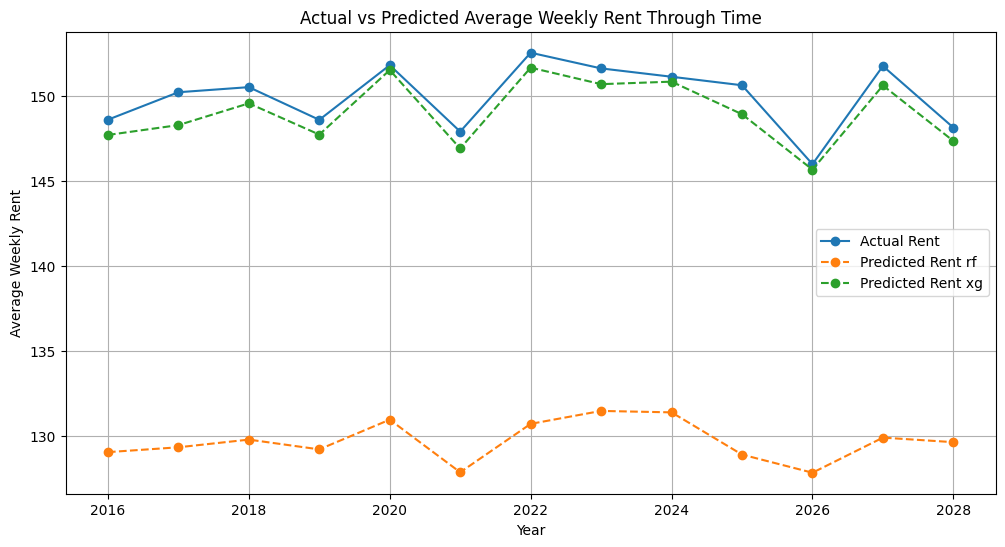

1200

In [56]:
# Calculate the predicted values by subtracting residuals from actual values
residuals_df['predicted_rent'] = residuals_df['average_weekly_rent'] - residuals_df['residuals']
residuals_df['predicted_rent_xg'] = residuals_df['average_weekly_rent'] - residuals_df['xg_residuals']

# Group by year and calculate the mean for actual and predicted rents
mean_rents = residuals_df.groupby('year')[['average_weekly_rent', 'predicted_rent',"predicted_rent_xg"]].mean().reset_index()

# Plot the actual vs predicted rents through time
plt.figure(figsize=(12, 6))
plt.plot(mean_rents['year'], mean_rents['average_weekly_rent'], marker='o', label='Actual Rent')
plt.plot(mean_rents['year'], mean_rents['predicted_rent'], marker='o', label='Predicted Rent rf', linestyle='--')
plt.plot(mean_rents['year'], mean_rents['predicted_rent_xg'], marker='o', label='Predicted Rent xg', linestyle='--')
plt.title('Actual vs Predicted Average Weekly Rent Through Time')
plt.xlabel('Year')
plt.ylabel('Average Weekly Rent')
plt.legend()
plt.grid(True)
plt.show()

150 * 8

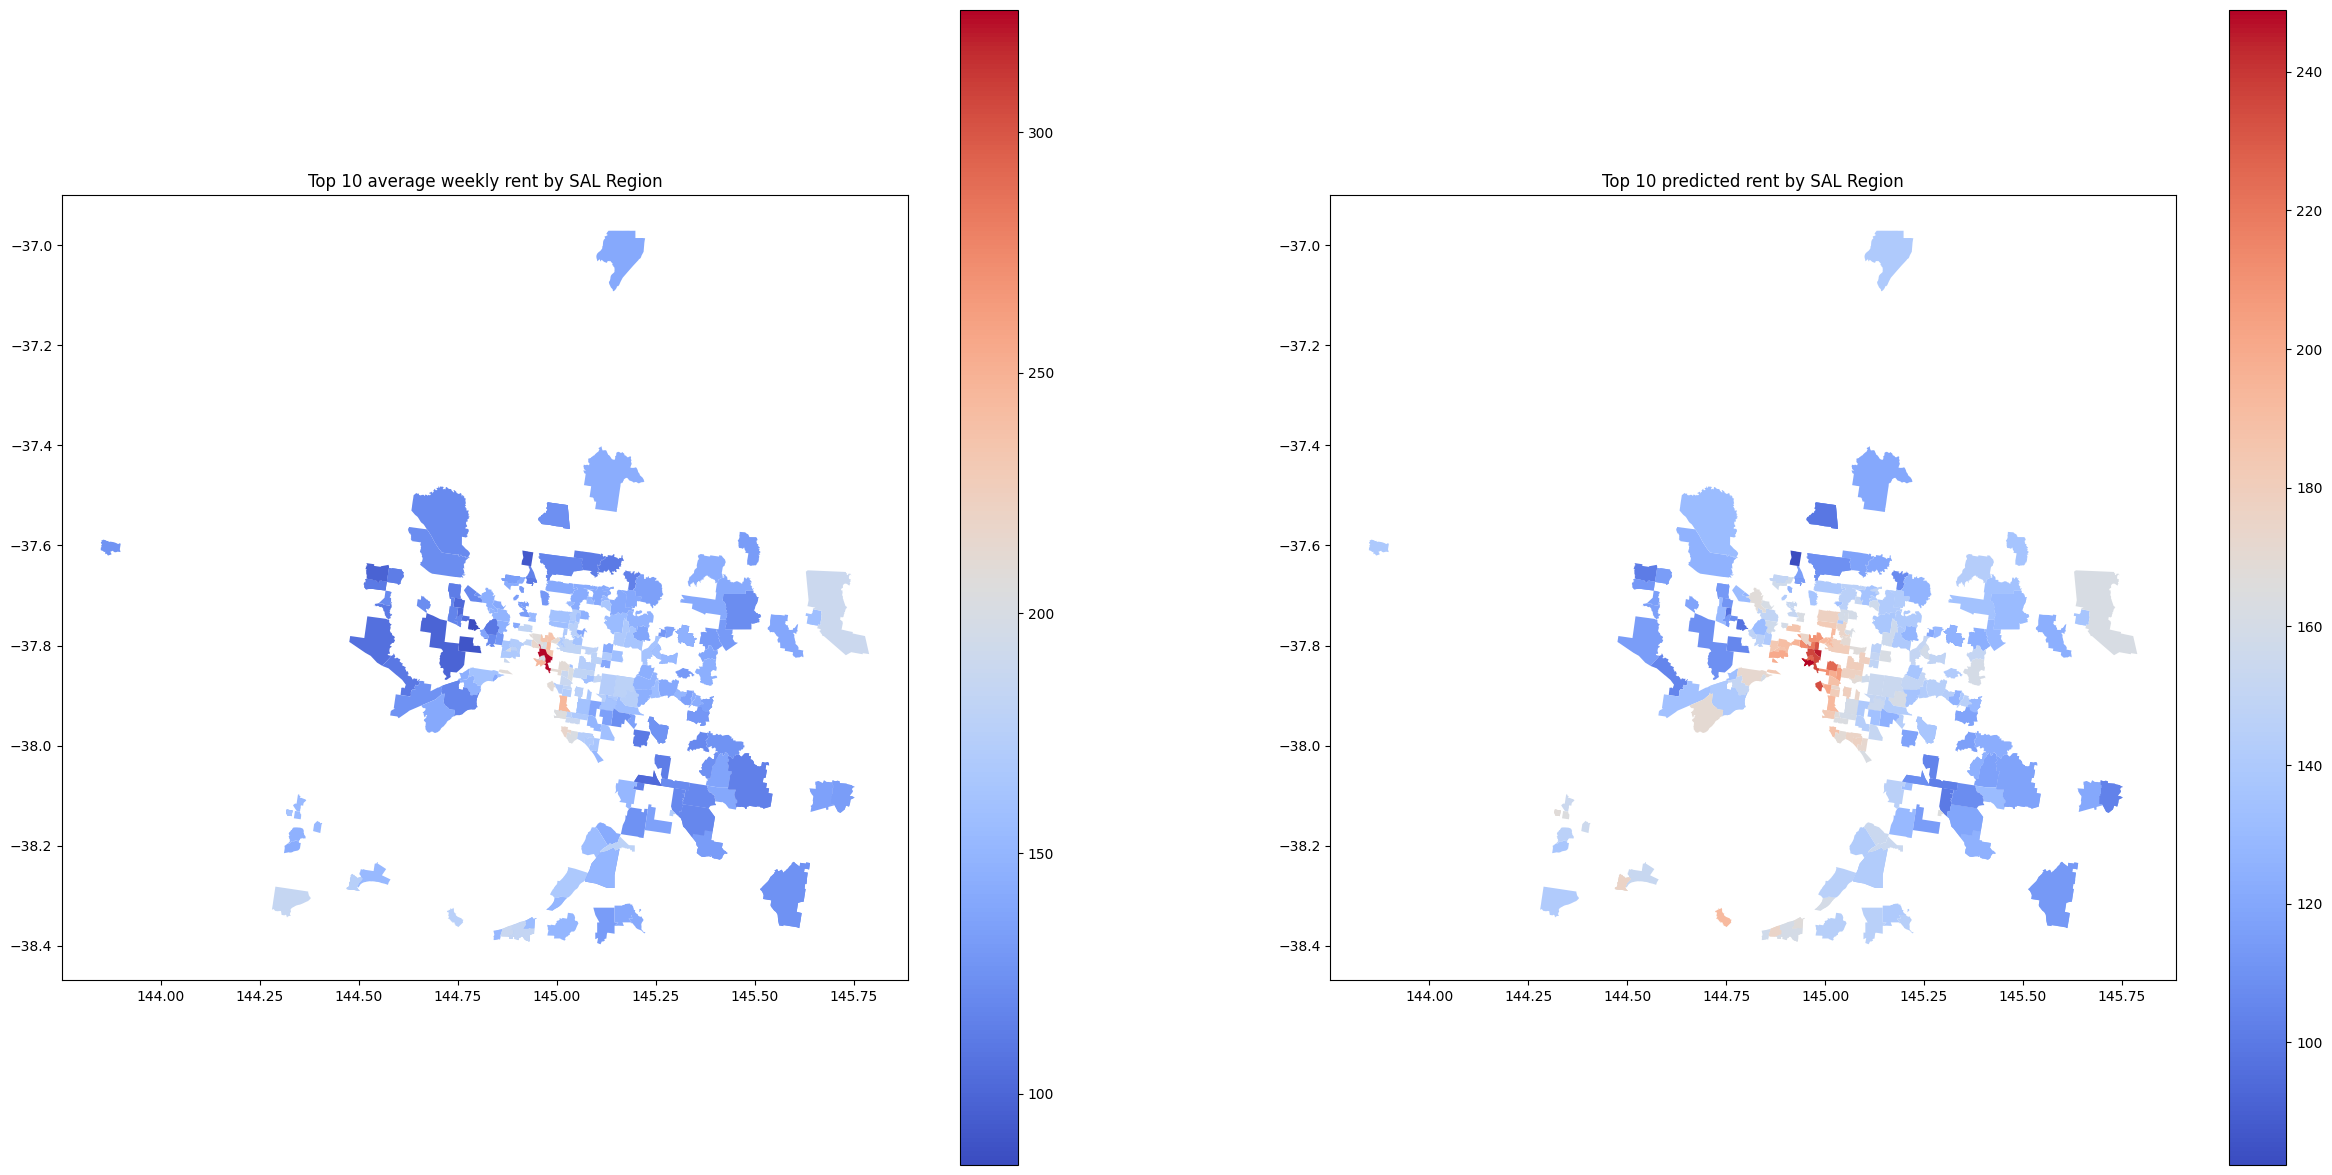

In [57]:

residuals_2023 = residuals_df[residuals_df["year"] == 2023]

# now make gdf

residuals_2023 = gpd.GeoDataFrame(residuals_2023, geometry='geometry')

# graph top 10 residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

residuals_2023.plot(column='average_weekly_rent', ax=ax1, legend=True, cmap='coolwarm')
ax1.set_title('Top 10 average weekly rent by SAL Region')

residuals_2023.plot(column='predicted_rent_xg', ax=ax2, legend=True, cmap='coolwarm')
ax2.set_title('Top 10 predicted rent by SAL Region')

plt.show()


### Part 3 - Growth Analysis

In [58]:
# Filter the data for the years 2018 to 2023 (inclusive)
filtered_df = residuals_df[residuals_df['year'].isin(range(2017,2019))]

# Ensure the data is sorted by year within each group for accurate calculations
filtered_df = filtered_df.sort_values(by=['SAL_CODE', 'year'])

# Calculate the growth in average weekly rent over the last 5 years for each suburb
filtered_df['growth_actual'] = filtered_df.groupby('SAL_CODE')['average_weekly_rent'].transform(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100 if len(x) > 1 else 0
)
filtered_df['growth_predicted'] = filtered_df.groupby('SAL_CODE')['predicted_rent_xg'].transform(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100 if len(x) > 1 else 0
)

# Drop duplicates to get one entry per suburb
suburb_growth_actual = filtered_df.drop_duplicates(subset='SAL_CODE', keep='last')
suburb_growth_predicted = filtered_df.drop_duplicates(subset='SAL_CODE', keep='last')

# Sort the suburbs by the highest growth in actual and predicted rents
highest_growth_actual = suburb_growth_actual.sort_values(by='growth_actual', ascending=False)
highest_growth_predicted = suburb_growth_predicted.sort_values(by='growth_predicted', ascending=False)

# Display the top suburbs with the highest growth
print("Suburbs with the highest growth in actual average weekly rent over the last 5 years:")
print(highest_growth_actual[['SAL_NAME21', 'growth_actual']][:10])

print("\nSuburbs with the highest growth in predicted average weekly rent over the last 5 years:")
print(highest_growth_predicted[['SAL_NAME21', 'growth_predicted']])


Suburbs with the highest growth in actual average weekly rent over the last 5 years:
        SAL_NAME21  growth_actual
3959     Docklands      25.910338
3743       Dromana      21.832196
2996        McCrae      21.832196
2939        Baxter      21.354527
845     Cranbourne      20.631041
3588    Crib Point      19.364961
3525     Frankston      19.145294
2357  Hampton Park      18.086756
548      Bentleigh      15.566225
2123     Chadstone      15.122271

Suburbs with the highest growth in predicted average weekly rent over the last 5 years:
            SAL_NAME21  growth_predicted
2357      Hampton Park         18.780303
2591  St Albans (Vic.)         13.065141
845         Cranbourne         11.492455
949          Dandenong         11.070777
1660     Albion (Vic.)         10.470943
...                ...               ...
2576        Balnarring         -8.089615
2124           Delahey         -8.401030
1153    Caulfield East         -9.419035
3060        Travancore        -12.983731
2

In [59]:
highest_growth_predicted[highest_growth_predicted["SAL_NAME21"] == 'Melbourne']

,SAL_CODE,year,residuals,xg_residuals,average_weekly_rent,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,...,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,distance_to_CBD,predicted_rent,predicted_rent_xg,growth_actual,growth_predicted
3215,21640.0,2018,51.323954,16.184687,257.038859,21640,Melbourne,2,Victoria,AUS,...,6.5866,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.21602,0.000674,"POLYGON ((144.96885 -37.80728, 144.97094 -37.8...",1.458285,205.714905,240.854173,-5.46998,-0.801138


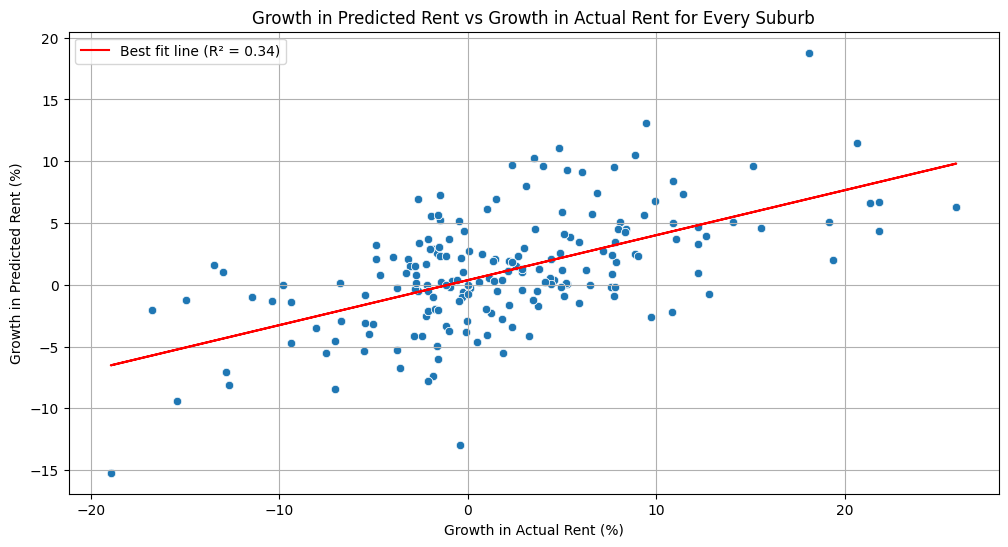

In [60]:
from scipy.stats import linregress

# Scatter plot of growth in predicted rent vs growth in actual rent for every suburb
plt.figure(figsize=(12, 6))
sns.scatterplot(x='growth_actual', y='growth_predicted', data=filtered_df)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['growth_actual'], filtered_df['growth_predicted'])
line = slope * filtered_df['growth_actual'] + intercept

# Plot the line of best fit
plt.plot(filtered_df['growth_actual'], line, color='red', label=f'Best fit line (R² = {r_value**2:.2f})')

plt.title('Growth in Predicted Rent vs Growth in Actual Rent for Every Suburb')
plt.xlabel('Growth in Actual Rent (%)')
plt.ylabel('Growth in Predicted Rent (%)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# compare actual and predicted rents for lg rf 
# Calculate the predicted values by subtracting residuals from actual values
residuals_df['predicted_rent'] = residuals_df['average_weekly_rent'] - residuals_df['residuals']

In [62]:
# find SAL code of 10 highest residuals
top_10_residuals = residuals_df.nlargest(10, 'residuals')[['SAL_CODE21', 'SAL_NAME21', 'residuals', 'year']]
print(top_10_residuals)

      SAL_CODE21       SAL_NAME21   residuals  year
1147       20338    Brighton East  121.324405  2019
1148       20338    Brighton East  112.099726  2027
1146       20338    Brighton East  110.535566  2027
1149       20338    Brighton East  109.515063  2023
3221       21640        Melbourne  109.403841  2023
3959       20766        Docklands  109.338114  2018
1145       20338    Brighton East  107.609951  2026
3098       22345    St Kilda West  106.000477  2020
220        20337  Brighton (Vic.)  105.524690  2017
3099       22345    St Kilda West  104.489860  2016


In [63]:
# bottom 10 residuals
bottom_10_residuals = residuals_df.nsmallest(10, 'residuals')[['SAL_CODE21', 'SAL_NAME21', 'residuals', 'year']]
print(bottom_10_residuals)


      SAL_CODE21          SAL_NAME21  residuals  year
2907       20640               Corio -42.488847  2027
2908       20640               Corio -41.482045  2020
2909       20640               Corio -37.311601  2026
2910       20640               Corio -33.388939  2020
2097       22333    St Andrews Beach -32.776089  2028
3274       22395     Sunshine (Vic.) -30.901298  2020
3897       20974        Geelong West -30.606703  2020
3706       22086          Point Cook -30.326941  2024
3040       22381  Strathmore Heights -30.045644  2024
2915       20640               Corio -29.685445  2026


In [64]:
# find SAL code of 10 highest residuals
top_10_residuals = residuals_2023.nlargest(30, 'average_weekly_rent')[['SAL_NAME21', 'average_weekly_rent', 'year']]
print(top_10_residuals)

              SAL_NAME21  average_weekly_rent  year
3221           Melbourne           325.477840  2023
2520           Southbank           275.864029  2023
1149       Brighton East           248.102562  2023
3892     South Melbourne           247.287553  2023
3895     South Melbourne           246.250570  2023
2638      Fitzroy (Vic.)           245.532242  2023
1150       Brighton East           245.383882  2023
2637      Fitzroy (Vic.)           240.124823  2023
3323       Fitzroy North           236.135370  2023
4161       Carlton North           234.874163  2023
2832      East Melbourne           234.305778  2023
4159       Carlton North           228.112632  2023
4158       Carlton North           225.424460  2023
62     Black Rock (Vic.)           216.998735  2023
2721     North Melbourne           215.659861  2023
3894     South Melbourne           215.633596  2023
3646        Clifton Hill           212.386161  2023
3731             Prahran           211.605655  2023
3174        

In [65]:
sal_to_exclude = pd.read_csv('../data/landing/filtered_sal_codes.csv')


In [66]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 137.37534087419698
Random Forest R^2 Score: 0.8984106362014739
